# Protein Structure Prediction

#Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/2018-06-06-pdb-intersect-pisces.csv")
#df = pd.read_csv('/content/drive/MyDrive/2018-06-06-ss.cleaned.csv')
df.head()

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa,Exptl.,resolution,R-factor,FreeRvalue
0,1FV1,F,NPVVHFFKNIVTPRTPPPSQ,CCCCCBCCCCCCCCCCCCCC,CCCCCECCCCCCCCCCCCCC,20,False,XRAY,1.90,0.23,0.27
1,1LM8,H,DLDLEMLAPYIPMDDDFQLR,CCCCCCCCCBCCSCCCEECC,CCCCCCCCCECCCCCCEECC,20,False,XRAY,1.85,0.20,0.24
2,1O06,A,EEDPDLKAAIQESLREAEEA,CCCHHHHHHHHHHHHHHHTC,CCCHHHHHHHHHHHHHHHCC,20,False,XRAY,1.45,0.19,0.22
3,1QOW,D,CTFTLPGGGGVCTLTSECI*,CCTTSCTTCSSTTSSTTCCC,CCCCCCCCCCCCCCCCCCCC,20,True,XRAY,1.06,0.14,1.00
4,1RDQ,I,TTYADFIASGRTGRRNAIHD,CHHHHHHTSSCSSCCCCEEC,CHHHHHHCCCCCCCCCCEEC,20,False,XRAY,1.26,0.13,0.16


# Visualization

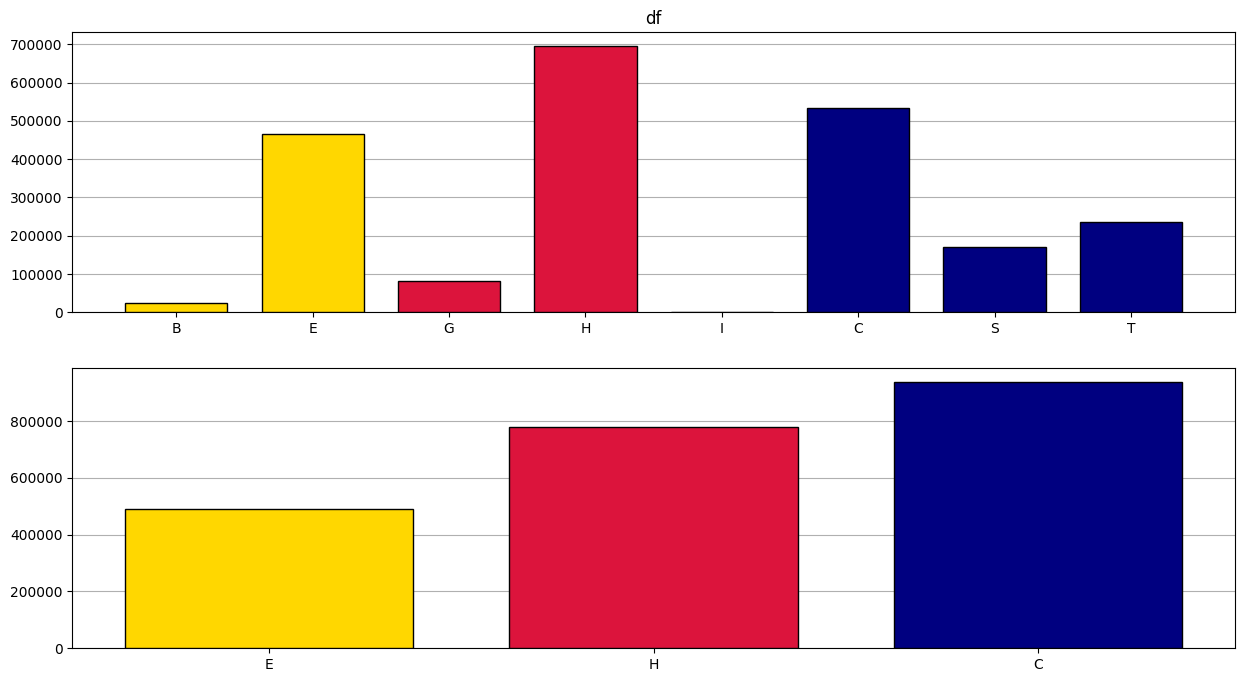

In [3]:
from collections import defaultdict
# Configures storage for the DataFrame df
SS_counts = {'df': {'SST-8': defaultdict(lambda: 0), 'SST-3': defaultdict(lambda: 0)}}

# Counts the types for the DataFrame df
for seq in df['sst8']:
    for ss in set(seq):
        SS_counts['df']['SST-8'][ss] += seq.count(ss)

for seq in df['sst3']:
    for ss in set(seq):
        SS_counts['df']['SST-3'][ss] += seq.count(ss)

# Sets the order for ss types
ss8_types = ['B', 'E', 'G', 'H', 'I', 'C', 'S', 'T']
ss3_types = ['E', 'H', 'C']

sst8_colors = ['gold', 'gold', 'crimson', 'crimson', 'crimson', 'navy', 'navy', 'navy']
sst3_colors = ['gold', 'crimson', 'navy']

fig, axs = plt.subplots(2, 1, sharey = 'row', figsize = (15, 8))

axs[0].bar(range(8), height = [SS_counts['df']['SST-8'][ss] for ss in ss8_types],
          tick_label = ss8_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst8_colors)
axs[0].grid(axis = 'y', which = 'both', zorder = 0)
axs[0].title.set_text('df')

axs[1].bar(range(3), height = [SS_counts['df']['SST-3'][ss] for ss in ss3_types],
          tick_label = ss3_types, edgecolor = 'black', width = 0.75, zorder = 3, color = sst3_colors)
axs[1].grid(axis = 'y', which = 'both', zorder = 0)

fig.show() # Exibe a figura

In [4]:
AA_counts = {'df': defaultdict(lambda: 0)}
for (seq, nonstd) in zip(df['seq'], df['has_nonstd_aa']):
    if not nonstd:
        for aa in set(seq):
            if aa != '*':
                AA_counts['df'][aa] += seq.count(aa)

# Order the amino acids by decreasing total abundance
total_aa = [AA_counts['df'][aa] for aa in AA_counts['df'].keys()]
temp = sorted(total_aa, reverse=True)
order = [total_aa.index(v) for v in temp]
aa_order = [list(AA_counts['df'].keys())[i] for i in order]

# Shows the proportion of each amino acid in a table
tbl_data = {'Amino Acid': aa_order,
            'df': [ round(AA_counts['df'][aa] / sum(AA_counts['df'].values()), 3) for aa in aa_order]}
pd.DataFrame(tbl_data)

,Amino Acid,df
0,L,0.091
1,A,0.082
2,G,0.073
3,V,0.068
4,E,0.067
5,S,0.063
6,D,0.059
7,K,0.056
8,I,0.055
9,T,0.054


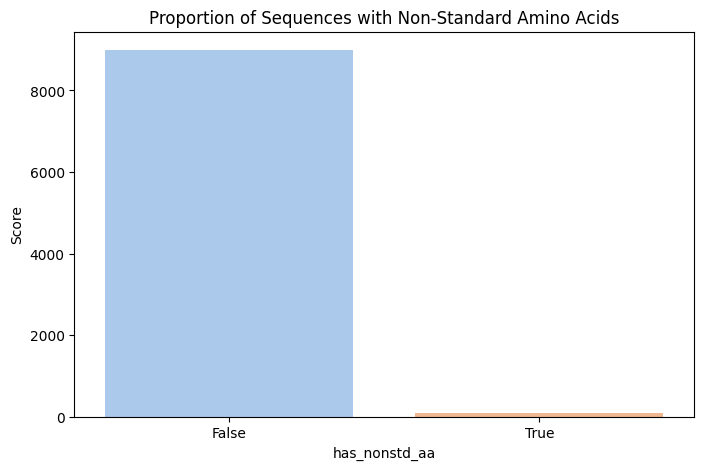

In [5]:
#Visualization of the proportion of sequences with non-standard amino acids
plt.figure(figsize=(8, 5))
sns.countplot(x='has_nonstd_aa', data=df, palette='pastel')
plt.title('Proportion of Sequences with Non-Standard Amino Acids')
plt.xlabel('has_nonstd_aa')
plt.ylabel('Score')
plt.show()

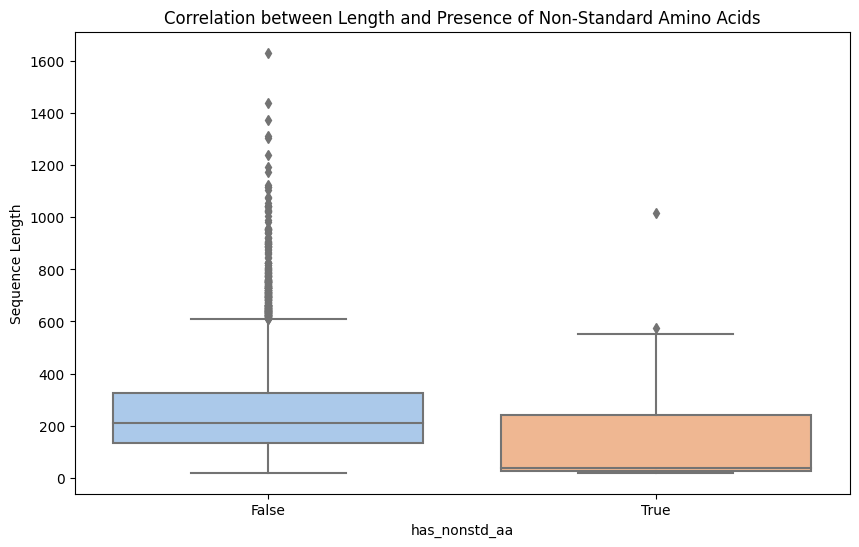

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='has_nonstd_aa', y='len', data=df, palette='pastel')
plt.title('Correlation between Length and Presence of Non-Standard Amino Acids')
plt.xlabel('has_nonstd_aa')
plt.ylabel('Sequence Length')
plt.show()

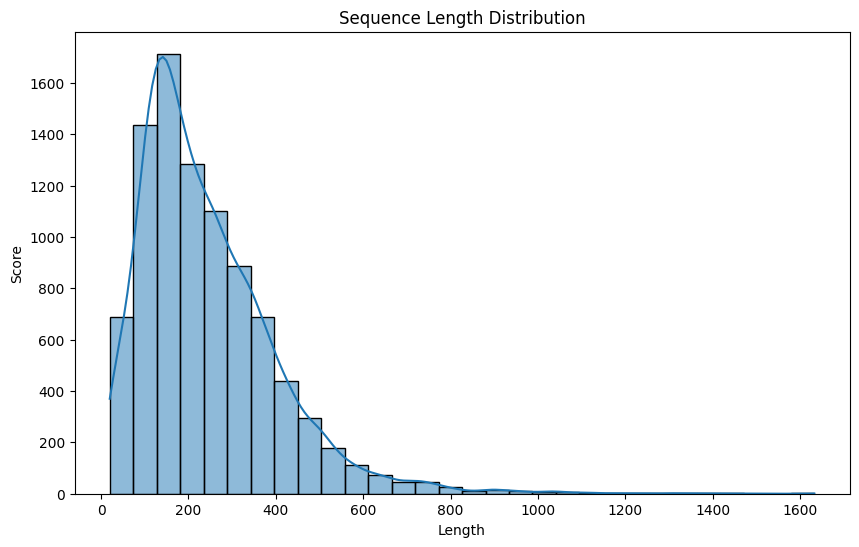

In [7]:
# Visualization of sequence length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['len'], bins=30, kde=True)
plt.title('Sequence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Score')
plt.show()

dict_a:  {'C': 62292, 'H': 89140, 'E': 30635}
dict_f:  {'C': 27852, 'H': 31875, 'E': 28754}
dict_p:  {'C': 72309, 'H': 19511, 'E': 9995}
dict_s:  {'C': 73981, 'H': 38857, 'E': 25705}


Text(0.5, 1.0, 'Secondary Structure character counts for aminoacid S')

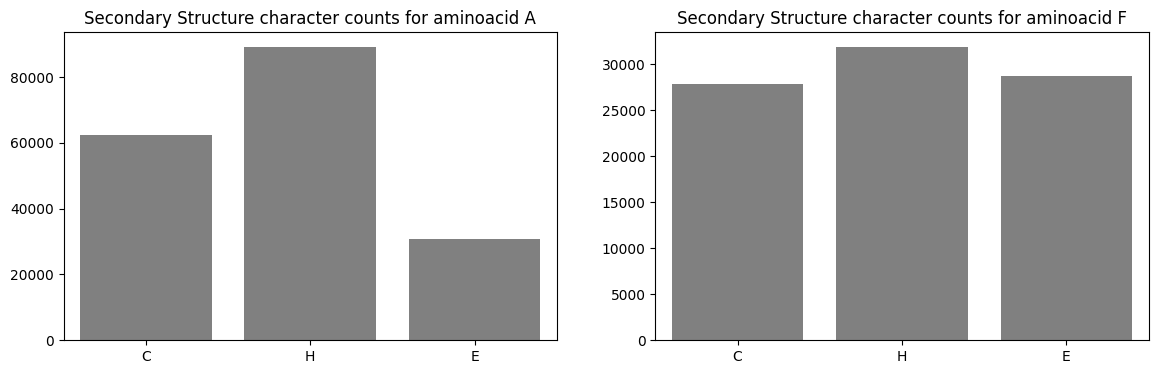

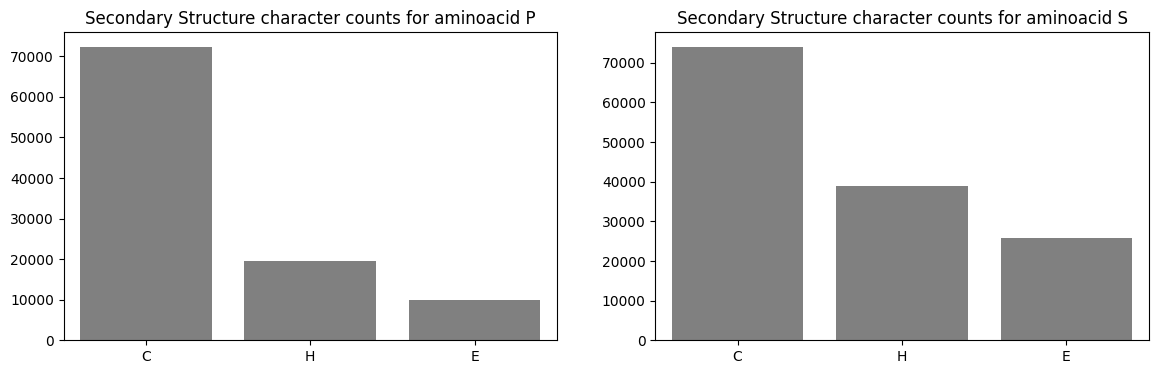

In [8]:
dict_a = {'C': [], 'H': [], 'E': []}
dict_f = {'C': [], 'H': [], 'E': []}
dict_p = {'C': [], 'H': [], 'E': []}
dict_s = {'C': [], 'H': [], 'E': []}

for se, sst in zip(df['seq'], df['sst3']):
    for s, ss in zip(se, sst):
        if s == 'A':
            if ss == 'C':
                dict_a['C'].append(1)
            elif ss == 'H':
                dict_a['H'].append(1)
            elif ss == 'E':
                dict_a['E'].append(1)
        elif s == 'F':
            if ss == 'C':
                dict_f['C'].append(1)
            elif ss == 'H':
                dict_f['H'].append(1)
            elif ss == 'E':
                dict_f['E'].append(1)
        elif s == 'P':
            if ss == 'C':
                dict_p['C'].append(1)
            elif ss == 'H':
                dict_p['H'].append(1)
            elif ss == 'E':
                dict_p['E'].append(1)
        elif s == 'S':
            if ss == 'C':
                dict_s['C'].append(1)
            elif ss == 'H':
                dict_s['H'].append(1)
            elif ss == 'E':
                dict_s['E'].append(1)

for k in dict_a.keys():
    dict_a[k] = sum(dict_a[k])
for k in dict_f.keys():
    dict_f[k] = sum(dict_f[k])
for k in dict_p.keys():
    dict_p[k] = sum(dict_p[k])
for k in dict_s.keys():
    dict_s[k] = sum(dict_s[k])

print('dict_a: ', dict_a)
print('dict_f: ', dict_f)
print('dict_p: ', dict_p)
print('dict_s: ', dict_s)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=list(dict_a.keys()), y=list(dict_a.values()), color='gray')
plt.title('Secondary Structure character counts for aminoacid A')
plt.subplot(1, 2, 2)
sns.barplot(x=list(dict_f.keys()), y=list(dict_f.values()), color='gray')
plt.title('Secondary Structure character counts for aminoacid F')

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=list(dict_p.keys()), y=list(dict_p.values()), color='gray')
plt.title('Secondary Structure character counts for aminoacid P')
plt.subplot(1, 2, 2)
sns.barplot(x=list(dict_s.keys()), y=list(dict_s.values()), color='gray')
plt.title('Secondary Structure character counts for aminoacid S')


In [9]:
#Sequence with majority length
length_values= df['len']
length_counts = length_values.value_counts()
print("Sequence Length      Counts:")
print(length_counts)

Sequence Length      Counts:
163     46
146     44
153     43
130     43
148     42
        ..
700      1
702      1
703      1
704      1
1632     1
Name: len, Length: 762, dtype: int64


# Preprocessing

In [10]:
# #Drop unnecessary column
# df.drop_duplicates(subset='seq',inplace=True)
# df.head()

# def clear_asterisks (df, seqs_colum_name, pct=30):
#   indices = []
#   for i, seq in enumerate(df[seqs_colum_name ]):
#     if (seq.count ('*')*100/len(seq)) <= pct: indices.append(i)
#   return df.iloc[indices]

# df = clear_asterisks(df, 'seq')
# df.info()

In [11]:
#Target Sequence
def seq2ngrams(seqs, n=3):
    return np.array([[seq[i:i+n] for i in range(len(seq))] for seq in seqs])

maxlen_seq = 500
input_seqs, target_seqs = df[['seq', 'sst3']][(df.len <= maxlen_seq) & (~df.has_nonstd_aa)].values.T
input_grams = seq2ngrams(input_seqs)
print(len(input_seqs))

8438


<ipython-input-11-244c71d9faa7>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([[seq[i:i+n] for i in range(len(seq))] for seq in seqs])


In [12]:
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

tokenizer_encoder = Tokenizer()
tokenizer_encoder.fit_on_texts(input_grams)
input_data = tokenizer_encoder.texts_to_sequences(input_grams)
input_data = sequence.pad_sequences(input_data, maxlen=maxlen_seq, padding='post')

tokenizer_decoder = Tokenizer(char_level=True)
tokenizer_decoder.fit_on_texts(target_seqs)
target_data = tokenizer_decoder.texts_to_sequences(target_seqs)
target_data = sequence.pad_sequences(target_data, maxlen=maxlen_seq, padding='post')
target_data = to_categorical(target_data)
input_data.shape, target_data.shape

((8438, 500), (8438, 500, 4))

## Bidirectional LSTM model(BLSTM)


In [13]:
from keras.models import Model
from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Bidirectional

n_words = len(tokenizer_encoder.word_index) + 1
n_tags = len(tokenizer_decoder.word_index) + 1
print(n_words, n_tags)

input = Input(shape=(maxlen_seq,))
x = Embedding(input_dim=n_words, output_dim=128, input_length=maxlen_seq)(input)
x = Bidirectional(LSTM(units=64, return_sequences=True, recurrent_dropout=0.1))(x)
y = TimeDistributed(Dense(n_tags, activation="softmax"))(x)
model = Model(input, y)
model.summary()

8417 4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding (Embedding)       (None, 500, 128)          1077376   
                                                                 
 bidirectional (Bidirection  (None, 500, 128)          98816     
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 500, 4)            516       
 ributed)                                                        
                                                                 
Total params: 1176708 (4.49 MB)
Trainable params: 1176708 (4.49 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Split and Train data

In [18]:
from sklearn.model_selection import train_test_split
from keras.metrics import categorical_accuracy
from keras import backend  as K
import tensorflow as tf

def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy", q3_acc])

X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=.4, random_state=0)
seq_train, seq_test, target_train, target_test = train_test_split(input_seqs, target_seqs, test_size=.4, random_state=0)

history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
40/40 [==============================] - 69s 2s/step - loss: 0.4567 - accuracy: 0.7511 - q3_acc: 0.4281 - val_loss: 0.4541 - val_accuracy: 0.7698 - val_q3_acc: 0.4707
Epoch 2/20
40/40 [==============================] - 67s 2s/step - loss: 0.4543 - accuracy: 0.7586 - q3_acc: 0.4454 - val_loss: 0.4551 - val_accuracy: 0.7479 - val_q3_acc: 0.4201
Epoch 3/20
40/40 [==============================] - 65s 2s/step - loss: 0.4520 - accuracy: 0.7632 - q3_acc: 0.4559 - val_loss: 0.4488 - val_accuracy: 0.7799 - val_q3_acc: 0.4938
Epoch 4/20
40/40 [==============================] - 65s 2s/step - loss: 0.4480 - accuracy: 0.7732 - q3_acc: 0.4788 - val_loss: 0.4473 - val_accuracy: 0.7615 - val_q3_acc: 0.4515
Epoch 5/20
40/40 [==============================] - 65s 2s/step - loss: 0.4409 - accuracy: 0.7823 - q3_acc: 0.4998 - val_loss: 0.4355 - val_accuracy: 0.7936 - val_q3_acc: 0.5253
Epoch 6/20
40/40 [==============================] - 65s 2s/step - loss: 0.4289 - accuracy: 0.7927 - q3_acc: 0.

#Evaluate model



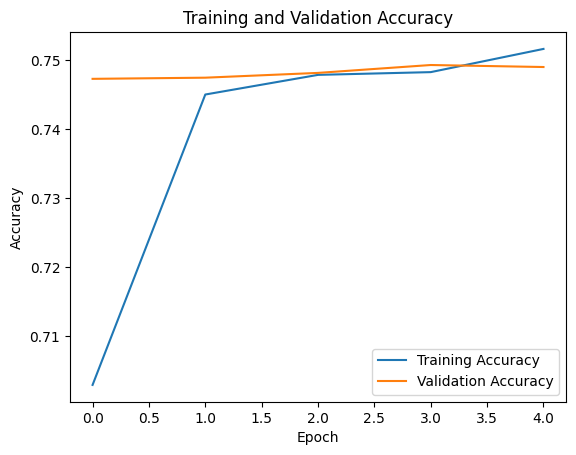

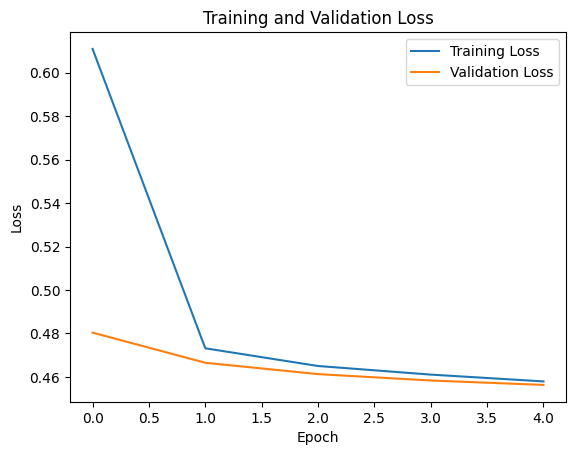

In [15]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
evals = model.evaluate(X_test,y_test)
print('accuracy:',evals[1])

106/106 [==============================] - 13s 120ms/step - loss: 0.4563 - accuracy: 0.7490 - q3_acc: 0.4229
accuracy: 0.7490497827529907


In [19]:
from keras import backend as K
import tensorflow as tf

def q3_acc(y_true, y_pred):
  y = tf.argmax(y_true, axis=-1)
  y_= tf.argmax(y_pred, axis = -1)
  mask = tf.greater(y,0)
  q3 = K.cast(K.equal(tf.boolean_mask(y, mask),tf.boolean_mask(y_,mask)),K.floatx())
  return sum(q3) / q3.shape[0]

preds = model.predict(X_test)
print(q3_acc(y_test,preds))

106/106 [==============================] - 14s 128ms/step
tf.Tensor(0.6571553, shape=(), dtype=float32)


1/1 [==============================] - 0s 79ms/step
training
---
Input: ASNQVTLAFANDAEISAFGFCTASEAVSYYSEAAASGFMQCRFVSFDLADTVEGLLPEDYVMVVVGTTKLSAYVDTFGSRPRNICGWLLFSNCNYFLEELELTFGRRGGLEHHHHHHH
Target: CCCEEEEEEECCCCEEEECECCHHHHHHHHHHHHHCCCCCEEEEEHHHHHHEECCCCCCEEEEEECCCCEEEEEEECCCCCCCEEEEEEEECCCEEEEEEEEEECCCCCCCCCCCCCC
Result: CCCCCEEEECCCCCHHHHCCCCCHHHHHHHHHHHCCCHCCCEEEEECCCCCCCCCCCCCCEEEEEECCCEEEEEEECCCCCCEEEEEEEECCCHHHHHHHHEECCCCCCCCCCCCCCC


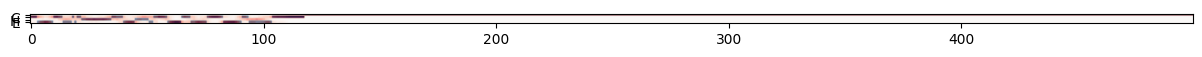

---
Input: GSHMRSRRVDVMDVMNRLILAMDLMNRDDALRVTGEVREYIDTVKIGYPLVLSEGMDIIAEFRKRFGCRIIADFKVADIPETNEKICRATFKAGADAIIVHGFPGADSVRACLNVAEEMGREVFLLTEMSHPGAEMFIQGAADEIARMGVDLGVKNYVGPSTRPERLSRLREIIGQDSFLISPGVGAQGGDPGETLRFADAIIVGRSIYLADNPAAAAAGIIESIKDLRIPEDPAANKARKEAELAAATAEQ
Target: CCCCCCCCCCCCCCHHHEEEEECCCCHHHHHHHHHHHHHHCCEEEEEHHHHHHHCCHHHHHHHHHHCCEEEEEEEECCCHHHHHHHHHHHHHCCCCEEEEECCCCHHHHHHHHHHHHHHCCEEEEECCCCCHHHHCCHHHHHHHHHHHHHHHCCCEEECCCCCHHHHHHHHHHHCCCCEEEECCECCCCECHHHHCCCCCEEEECHHHHCCCCHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCC
Result: CCCCCCCCCCEHHHHHHHHHHHHHHCCCHHHEECCEEEEEECCEEECCCEEECCCHHHHHHHHHHHCHHEEEEEECCCCCCCCHHHHHHHHHCCCCEEEEECCCCCCHHHHHHHHHHHHHHHHEEHHCCCCCCCHHHHHHHHHHHHHHCCCCCCCCECCCCCCHHHHHHHHHHHHCCCEEECCCCCCCCCCCCCCHEHHHHEEECCCEEECCCCHHHHHHHHHHHHCCCCCCCCHHHHHHHHHHHHHCCCCC


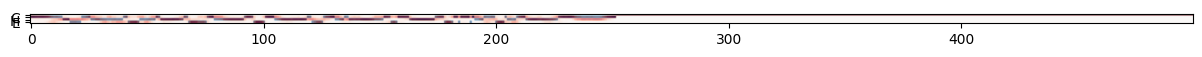

---
Input: MVDEHKAHKAILAYEKGWLAFSLAMLFVFIALIAYTLATHTAGVIPAGKLERVDPTTVRQEGPWADPAQAVVQTGPNQYTVYVLAFAFGYQPNPIEVPQGAEIVFKITSPDVIHGFHVEGTNINVEVLPGEVSTVRYTFKRPGEYRIICNQYCGLGHQNMFGTIVVKE
Target: CCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCHHHHHCCCCCCCECCCCCCCCCCCCCCHHHCEEEEECCEEEEEEEEECCEEECCCEEEECCCEEEEEEECCCCCEEEEECCCCCEEEECCCECEEEEEECCCCEEEEEECCCCCCCCHHHCEEEEEEEC
Result: CCCCCCHHHHHHHHHCCHHEEHHHHEEEEEEEEEEHHHCCCCCCCCCCCEEECCCCCEEECCCCCCCCCEEEECCCCCEEEEEEEEEECCCCCCECCCCCCEEEEEEECCCEEEEEEEECCCEEEEEECCEEEEEEEEECCCCEEEEEEECCCCCCCCCCCCEEEECC


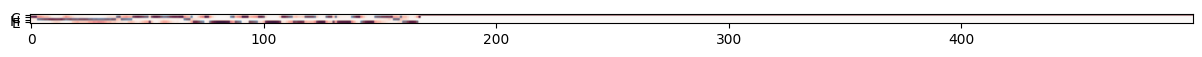

testing
---
Input: GMDDLTNLAARLRLLEDREEIRELIARYGPLADSGDAEALSELWVEDGEYAVVGFATAKGRAAIAALIDGQTHRALMADGCAHFLGPATVTVEGDTATARCHSVVFRCVSGTFGSHRVSANRWTFRRTPAGWRAVRRENALLDGSAAARALLQFR
Target: CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHCCEEEEEEEEECCCCCEECHHHHHHHHHCHHHHHHHHHCEEEEECCCEEEEECCEEEEEEEEEEEEEECCEEEEEEEEEEEEEEEEECCEEEEEEEEEEECCCCHHHHHHHCCC
Result: CCCCCHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCCHHHHHHHHHCCCCEEEEEEEHHCHHHHHHHHHCCCHHHHHHCCCCCEEECCCEEEEECCCCEEEEEEEEEEEECCECCCCEEECCCEEEECCCCCHHHHHHHHHHHCCHHHHHHHHCCC


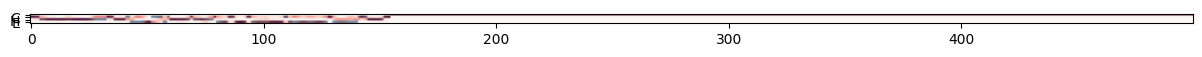

---
Input: MSGIAEFDGILDSLEHSKTGISGSKILKLTNLSMENVSENAQFVASVYKYAKRAPVTHKLGALYILDSIVRSFQDGAKKNNESFENPVDASFSGGWCKAAEITDSLVADAIQHAPSAHLPKILKLCDIWEKASTFPPEKLESLRSKLKDAMALEHHHHHHHH
Target: CCCHHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHCHHHHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHHCCCCCCCCCCCC
Result: CCCCCCCCHHHCCCCCCCCCCCCCHHEEECCCCCCCCCCCHHHHHHEECCCCCCCCCHCCCHEHHHHHHHHHHCCCCCCCCCCECCCCCCCCCCCHHHHHHHHHHHHHHHHHCCCCCCCCHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHCCCCCCCCCCCC


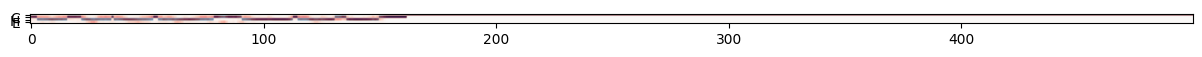

---
Input: GSSINWPPEFHPGVPWKGLQNI
Target: CCCCCCCCCCCCCCCCCCCCCC
Result: CCCCCCCCCCCCCCCCCCCCCC


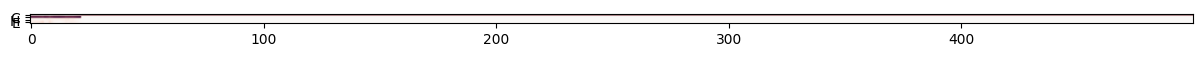

In [32]:
#Viewing Result
def onehot_to_seq(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

def plot_results(x, y, y_):
    print("---")
    print("Input: " + str(x))
    print("Target: " + str(onehot_to_seq(y, revsere_decoder_index).upper()))
    print("Result: " + str(onehot_to_seq(y_, revsere_decoder_index).upper()))
    fig = plt.figure(figsize=(15,50))
    plt.imshow(y.T, cmap='Blues')
    plt.imshow(y_.T, cmap='Reds', alpha=.5)
    plt.yticks(range(4), [' '] + [revsere_decoder_index[i+1].upper() for i in range(3)])
    plt.show()

revsere_decoder_index = {value:key for key,value in tokenizer_decoder.word_index.items()}
revsere_encoder_index = {value:key for key,value in tokenizer_encoder.word_index.items()}

N=3
y_train_pred = model.predict(X_train[:N])
y_test_pred = model.predict(X_test[:N])
print('training')
for i in range(N):
    plot_results(seq_train[i], y_train[i], y_train_pred[i])
print('testing')
for i in range(N):
    plot_results(seq_test[i], y_test[i], y_test_pred[i])

# Bidirectional TCN model(BTCN)

In [22]:
!pip install keras-tcn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 3.7 MB/s eta 0:00:00


In [33]:
from tcn import TCN

input_layer = Input(shape=(maxlen_seq,))
x = Embedding(input_dim=n_words, output_dim=128, input_length=maxlen_seq)(input_layer)
x = Bidirectional(TCN(return_sequences=True))(x)  # Wrap TCN with Bidirectional
y = TimeDistributed(Dense(n_tags, activation="softmax"))(x)
model = Model(input_layer, y)
model.summary()

def q3_acc(y_true, y_pred):
    y = tf.argmax(y_true, axis=-1)
    y_ = tf.argmax(y_pred, axis=-1)
    mask = tf.greater(y, 0)
    return K.cast(K.equal(tf.boolean_mask(y, mask), tf.boolean_mask(y_, mask)), K.floatx())

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy", q3_acc])

X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=.4, random_state=0)
seq_train, seq_test, target_train, target_test = train_test_split(input_seqs, target_seqs, test_size=.4, random_state=0)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 500)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 500, 128)          1077376   
                                                                 
 bidirectional_1 (Bidirecti  (None, 500, 128)          337536    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 500, 4)            516       
 stributed)                                                      
                                                                 
Total params: 1415428 (5.40 MB)
Trainable params: 1415428 (5.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
40/40 [==============================] - 124s 3s/step - loss: 0.5923 - accuracy: 0.7003 - q3_acc: 0.3681 - val_loss: 0.4731 - val_accuracy: 0.7434 - val_q3_acc: 0.4098
Epoch 2/20
40/40 [==============================] - 118s 3s/step - loss: 0.4715 - accuracy: 0.7453 - q3_acc: 0.4147 - val_loss: 0.4716 - val_accuracy: 0.7369 - val_q3_acc: 0.3949
Epoch 3/20
40/40 [==============================] - 118s 3s/step - loss: 0.4625 - accuracy: 0.7500 - q3_acc: 0.4256 - val_loss: 0.4620 - val_accuracy: 0.7483 - val_q3_acc: 0.4212
Epoch 4/20
40/40 [==============================] - 115s 3s/step - loss: 0.4553 - accuracy: 0.7561 - q3_acc: 0.4396 - val_loss: 0.4564 - val_accuracy: 0.7659 - val_q3_acc: 0.4617
Epoch 5/20
40/40 [==============================] - 116s 3s/step - loss: 0.4420 - accuracy: 0.7738 - q3_acc: 0.4802 - val_loss: 0.4223 - val_accuracy: 0.7913 - val_q3_acc: 0.5201
Epoch 6/20
40/40 [==============================] - 116s 3s/step - loss: 0.4068 - accuracy: 0.8058 - q3_a

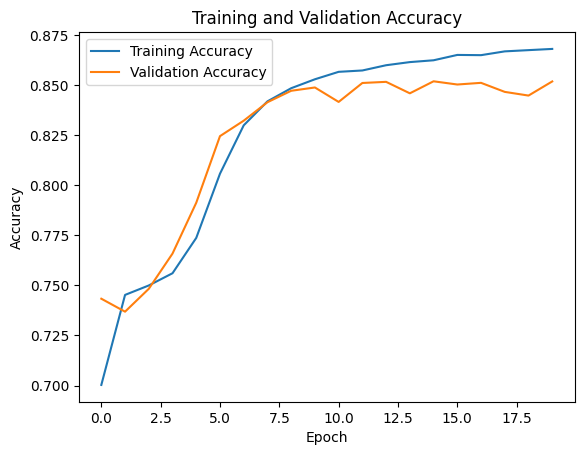

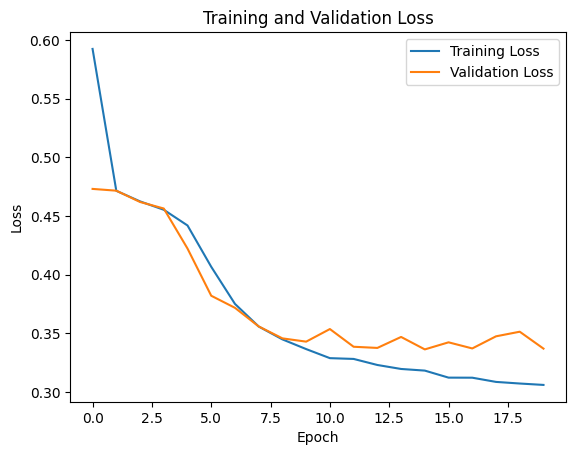

In [35]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 76ms/step
training
---
Input: ASNQVTLAFANDAEISAFGFCTASEAVSYYSEAAASGFMQCRFVSFDLADTVEGLLPEDYVMVVVGTTKLSAYVDTFGSRPRNICGWLLFSNCNYFLEELELTFGRRGGLEHHHHHHH
Target: CCCEEEEEEECCCCEEEECECCHHHHHHHHHHHHHCCCCCEEEEEHHHHHHEECCCCCCEEEEEECCCCEEEEEEECCCCCCCEEEEEEEECCCEEEEEEEEEECCCCCCCCCCCCCC
Result: CCCCEEEEEECCCCEEEECCECCHHHHHHHHHHHCCCCCCEEEEEEEECCCCCCCCCCCCEEEEEEECCCCEEEEECCCCCCEEEEEEEECCCHHHHHHHHCCCCCCCCCCCCCCCCC


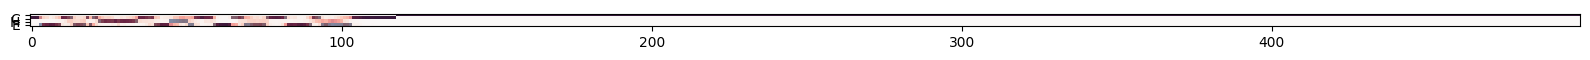

---
Input: GSHMRSRRVDVMDVMNRLILAMDLMNRDDALRVTGEVREYIDTVKIGYPLVLSEGMDIIAEFRKRFGCRIIADFKVADIPETNEKICRATFKAGADAIIVHGFPGADSVRACLNVAEEMGREVFLLTEMSHPGAEMFIQGAADEIARMGVDLGVKNYVGPSTRPERLSRLREIIGQDSFLISPGVGAQGGDPGETLRFADAIIVGRSIYLADNPAAAAAGIIESIKDLRIPEDPAANKARKEAELAAATAEQ
Target: CCCCCCCCCCCCCCHHHEEEEECCCCHHHHHHHHHHHHHHCCEEEEEHHHHHHHCCHHHHHHHHHHCCEEEEEEEECCCHHHHHHHHHHHHHCCCCEEEEECCCCHHHHHHHHHHHHHHCCEEEEECCCCCHHHHCCHHHHHHHHHHHHHHHCCCEEECCCCCHHHHHHHHHHHCCCCEEEECCECCCCECHHHHCCCCCEEEECHHHHCCCCHHHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCC
Result: CCCCCCCCCCCCHHHHHHHHHHHCCCCCCHHEEECEEEEEECCCEECCCEECCCCHHHHHHHHHHCCCEEEEEEEECCCCCCCHHHHHHHHHCCCCEEEEECCCCCCHHHHHHHHHHHHCCCEEEEECCCCCCCHEHHHCHHHHHHHHCCCCCCCEECCCCCCHHHHHHHHHHHCCCCEEECCCCCCCCCCCCCCCCECEEEEEECCEECCCCCHHHHHCHEHEHHCCCCCCCCHHHCCCHHHHHHCCCCCC


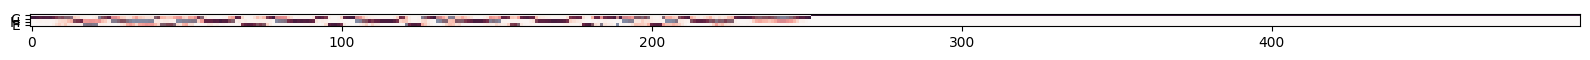

---
Input: MVDEHKAHKAILAYEKGWLAFSLAMLFVFIALIAYTLATHTAGVIPAGKLERVDPTTVRQEGPWADPAQAVVQTGPNQYTVYVLAFAFGYQPNPIEVPQGAEIVFKITSPDVIHGFHVEGTNINVEVLPGEVSTVRYTFKRPGEYRIICNQYCGLGHQNMFGTIVVKE
Target: CCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCHHHHHCCCCCCCECCCCCCCCCCCCCCHHHCEEEEECCEEEEEEEEECCEEECCCEEEECCCEEEEEEECCCCCEEEEECCCCCEEEECCCECEEEEEECCCCEEEEEECCCCCCCCHHHCEEEEEEEC
Result: CCCCCCCCHHHHHHHCCCEEEEEEEEEEEHEHEHHHHHHHCCCCCCCCCCCCCCCCCCCCCCCCCCCCCEEEECCCCCEEEEEEEEECCCCCCCCCCCCCCEEEEEEECCCCEECEEECCCCEEEEECCCEEEEEEEEECCCCEEEEEEECCCCCCCCCCCCEEEECC


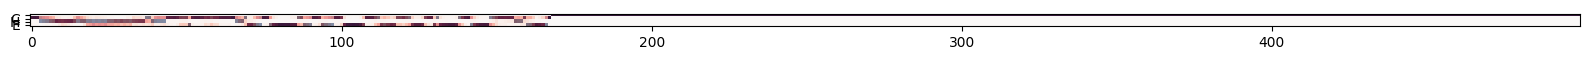

testing
---
Input: GMDDLTNLAARLRLLEDREEIRELIARYGPLADSGDAEALSELWVEDGEYAVVGFATAKGRAAIAALIDGQTHRALMADGCAHFLGPATVTVEGDTATARCHSVVFRCVSGTFGSHRVSANRWTFRRTPAGWRAVRRENALLDGSAAARALLQFR
Target: CCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHCCEEEEEEEEECCCCCEECHHHHHHHHHCHHHHHHHHHCEEEEECCCEEEEECCEEEEEEEEEEEEEECCEEEEEEEEEEEEEEEEECCEEEEEEEEEEECCCCHHHHHHHCCC
Result: CCCCCHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCCHHHHHHHHHHCCCEEEEEEECCCCHHHHHHHHCCCHHHHHCCCCCCEEECCEEEEEECCCCCECEEEEEEEEEEEEECCCCEECEEEEEECCCCHHHEEHHHHHHCCCCHHHHHHHCCC


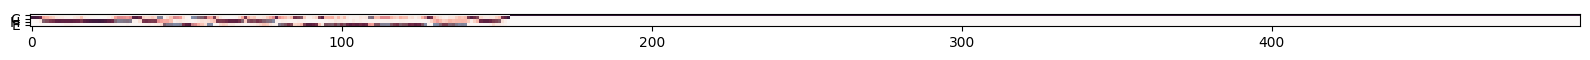

---
Input: MSGIAEFDGILDSLEHSKTGISGSKILKLTNLSMENVSENAQFVASVYKYAKRAPVTHKLGALYILDSIVRSFQDGAKKNNESFENPVDASFSGGWCKAAEITDSLVADAIQHAPSAHLPKILKLCDIWEKASTFPPEKLESLRSKLKDAMALEHHHHHHHH
Target: CCCHHHHHHHHHHHHHCCCCCCHHHHHHHHHHHHHCHHHHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHHHHHHHHHHHCCCCCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHCCHHHHHHHHHHHHHHHHCCCCCHHHHHHHHHHHHHHCCCCCCCCCCCC
Result: CCCCCCCCCCCCCCCCCCCCCCCCEEEEECCCCCCCCCCCHHHHHEEEECCCCCCCCHHCCHHHEEHHHHHHHCCCCCCCCCEEECCCCCCCCHHHHHHHHHHHHHHHHHHCCCCCCCCHHHHHHHHHHHHHCCCCHHHHHHHHHHHHHCCCCCCCCCCCCC


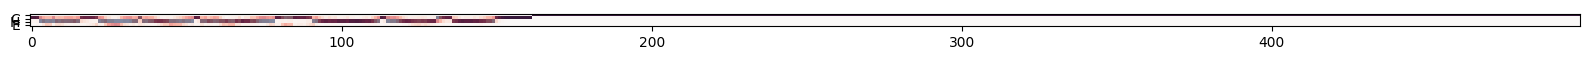

---
Input: GSSINWPPEFHPGVPWKGLQNI
Target: CCCCCCCCCCCCCCCCCCCCCC
Result: CCCCCCCCCCCCCCCCCCCCCC


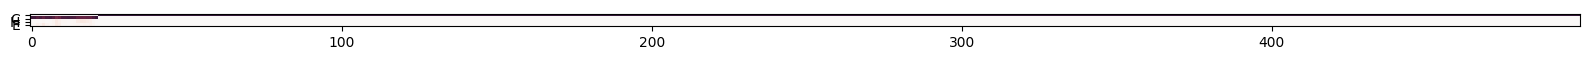

In [50]:
#Viewing Result
def onehot_to_seq(oh_seq, index):
    s = ''
    for o in oh_seq:
        i = np.argmax(o)
        if i != 0:
            s += index[i]
        else:
            break
    return s

def plot_results(x, y, y_):
    print("---")
    print("Input: " + str(x))
    print("Target: " + str(onehot_to_seq(y, revsere_decoder_index).upper()))
    print("Result: " + str(onehot_to_seq(y_, revsere_decoder_index).upper()))
    fig = plt.figure(figsize=(20,150))
    plt.imshow(y.T, cmap='Blues')
    plt.imshow(y_.T, cmap='Reds', alpha=.5)
    plt.yticks(range(4), [' '] + [revsere_decoder_index[i+1].upper() for i in range(3)])
    plt.show()
# Add the reverse_decoder_index definition
revsere_decoder_index = {value:key for key,value in tokenizer_decoder.word_index.items()}
revsere_encoder_index = {value:key for key,value in tokenizer_encoder.word_index.items()}

N=3
y_train_pred = model.predict(X_train[:N])
y_test_pred = model.predict(X_test[:N])
print('training')
for i in range(N):
    plot_results(seq_train[i], y_train[i], y_train_pred[i])
print('testing')
for i in range(N):
    plot_results(seq_test[i], y_test[i], y_test_pred[i])